Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.3209 - val_loss: 0.1409
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1322 - val_loss: 0.1101
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1088 - val_loss: 0.1000
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0999 - val_loss: 0.0945
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0950 - val_loss: 0.0913
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0919 - val_loss: 0.0888
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0896 - val_loss: 0.0869
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0874 - val_loss: 0.0851
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0857 - val_loss: 0.0843
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0847 - val_loss: 0.0829
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0835 - val_loss: 0.0820
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

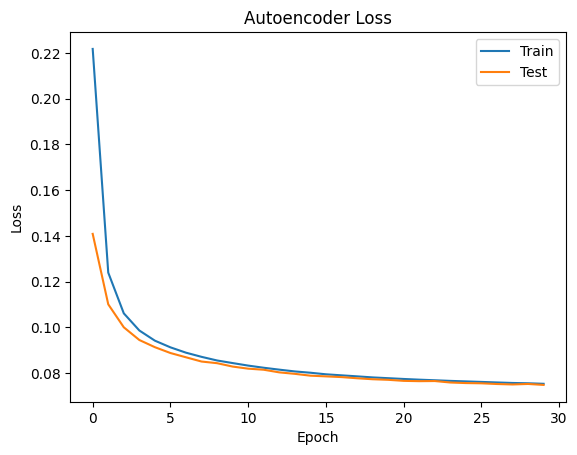

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


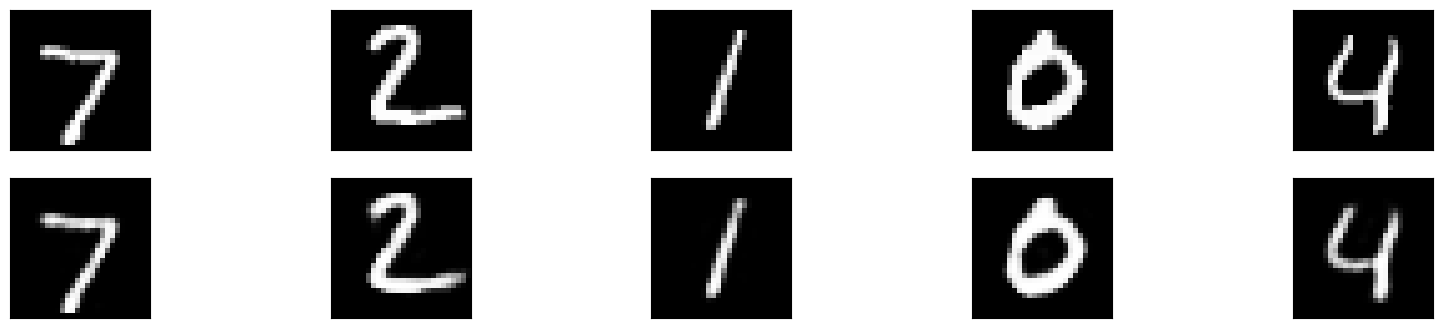

In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load MNIST from local file
data = np.load('mnist.npz')  # Ensure the file is in the same directory
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Normalize the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images for model input
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Define and Train Autoencoder
encoding_dim = 64
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train, 
                          epochs=30, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_data=(x_test, x_test))

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Encode and Decode
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualize Original vs Reconstructed Images
plt.figure(figsize=(20, 4))
for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
